In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('aftercleaning.csv')

In [5]:
df.head()

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Average slary,Min slary,Max slary,age,python,R,power bi
0,"Sr. Manager, Data Science - Fraud & ML Platform",Overview:\nABOUT OPORTUN\n\nOportun is a missi...,4.2,Oportun Inc,"San Carlos, CA",3000,2005,Company - Public,Lending,Finance,Unknown / Non-Applicable,169.0,130,208,15,1,1,1
1,Data Science Manager,Come join a growing financial technology compa...,4.1,"Continental Finance Company, LLC","Wilmington, DE",125,2005,Company - Private,Lending,Finance,Unknown / Non-Applicable,120.0,89,151,15,1,1,1
2,Operations Data Analyst,Make your mark. With more than $17.2 billion o...,3.8,Plante Moran,"Kalamazoo, MI",3000,1924,Company - Private,Accounting,Accounting & Legal,$500 million to $1 billion (USD),49.0,36,62,96,0,1,1
3,Data Analyst,"Overview:\nAt Grow Financial, we believe in se...",3.6,Grow Financial,"Brandon, FL",750,1955,Nonprofit Organization,Banks & Credit Unions,Finance,$50 to $100 million (USD),48.5,35,62,65,1,1,1
4,Data Scientist,What you’ll be doing...\nBe a part of the team...,3.9,Verizon,"Ashburn, VA",15000,2000,Company - Public,Telecommunications Services,Telecommunications,$10+ billion (USD),108.0,83,133,20,1,1,1


In [6]:
df['Job Title'].value_counts()

Data Scientist                          10
Data Engineer                            7
Data Analyst                             5
Machine Learning Engineer                2
Senior Data Analyst                      2
                                        ..
Nursing Excellence Data Coordinator      1
Senior Cloud Infrastructure Engineer     1
Data Scientist (TS/SCI required)         1
MSP - Data & Analytics (DA)              1
Data Scientist 2                         1
Name: Job Title, Length: 69, dtype: int64

In [25]:
def jobtitle(x):
    if 'data scientist' in x.lower():
        return 'data scientist'
    elif 'data engineer' in x.lower():
        return 'data engineer'
    elif 'manager' in x.lower():
        return 'manager'
    elif 'data analyst' in x.lower():
        return 'data analyst'
    elif 'machine learning' in x.lower():
        return 'ML'
    elif 'data & analyticst' in x.lower():
        return 'data analyst'
    else:
        return 'nan'
    
def seniority(x):
    if 'Senior ' in x.lower() or 'sr' in x.lower() or 'sr ' in x.lower() or 'lead' in x.lower() or 'principal' in x.lower():
        return 'Senior'
    elif 'jr' in x.lower() or 'jr.' in x.lower() or 'Jr' in x.lower():
        return 'Junior'
    else:
        return 'dont know'
    
    
    

In [26]:
df['job title']=df['Job Title'].apply(jobtitle)

In [29]:
df['Seniority']=df['job title'].apply(seniority)

In [31]:
df['Seniority'].value_counts()

dont know    91
Name: Seniority, dtype: int64

In [36]:
df[df['job title'].str.contains('sr')]

,Job Title,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Average slary,Min slary,Max slary,age,python,R,power bi,job title,Seniority


In [42]:
df.describe()

,Rating,Size,Founded,Average slary,Min slary,Max slary,age,python
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,3.512088,4625.824176,1738.362637,91.741758,67.582418,115.901099,37.340659,0.516484
std,1.393384,5990.081444,649.422710,23.981980,18.608281,29.695512,36.489944,0.502497
min,-1.000000,0.000000,-1.000000,42.000000,27.000000,57.000000,0.000000,0.000000
25%,3.500000,125.000000,1936.000000,74.500000,54.000000,95.000000,9.000000,0.000000
50%,3.800000,750.000000,1982.000000,105.000000,76.000000,130.000000,22.000000,1.000000
75%,4.200000,7500.000000,2005.000000,105.000000,80.000000,130.000000,60.000000,1.000000
max,5.000000,15000.000000,2020.000000,169.000000,130.000000,209.000000,160.000000,1.000000


In [39]:
df=df.drop('R',axis=1)

In [ ]:
df=df.drop('power bi',axis=1)

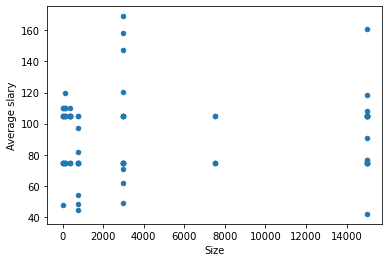

In [46]:
# scatter plot Size/Average slary
var = 'Size'
data = pd.concat([df['Average slary'], df[var]], axis=1)     
data.plot.scatter(x=var, y='Average slary');



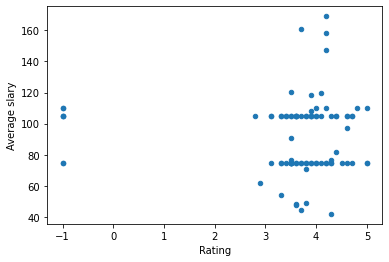

In [48]:
# scatter plot Rating/Average slary
var = 'Rating'
data = pd.concat([df['Average slary'], df[var]], axis=1)     
data.plot.scatter(x=var, y='Average slary');


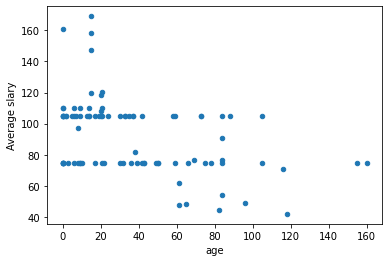

In [50]:
# scatter plot age/Average slary
var = 'age'
data = pd.concat([df['Average slary'], df[var]], axis=1)     
data.plot.scatter(x=var, y='Average slary');


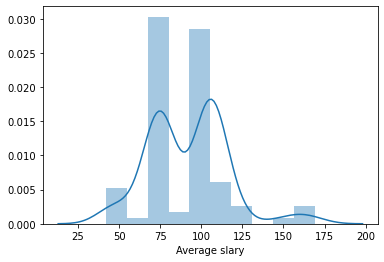

In [52]:
sns.distplot(df['Average slary']);

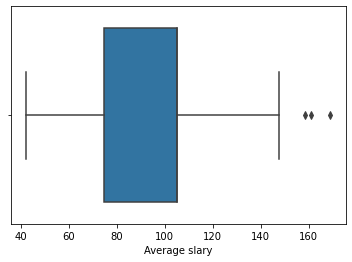

In [54]:
sns.boxplot(x='Average slary', data=df);

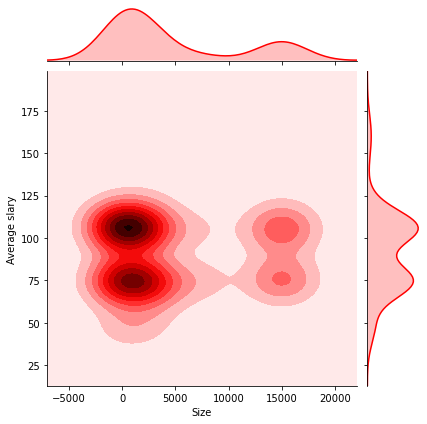

In [56]:
sns.jointplot(df["Size"], df["Average slary"], color='red', kind="kde")

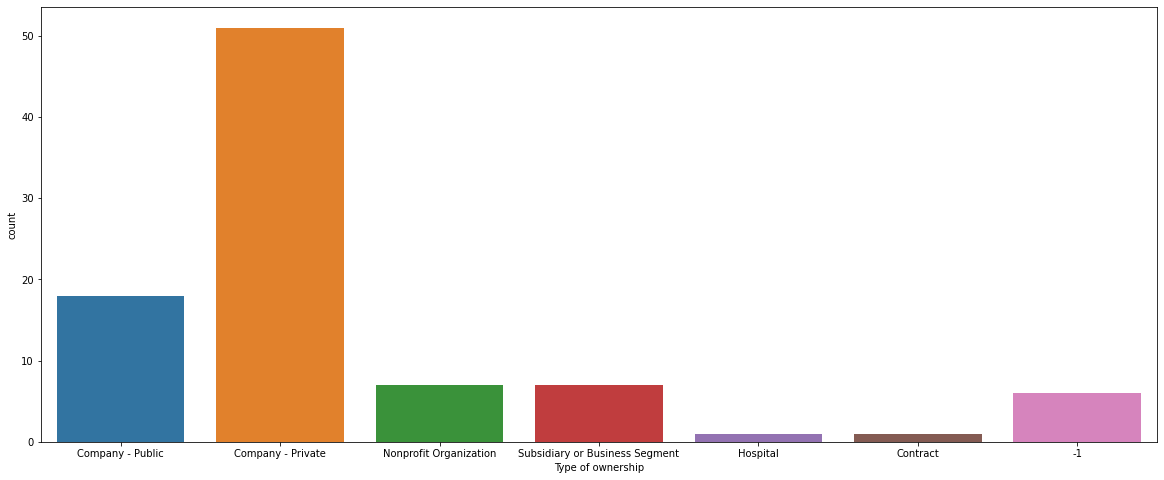

In [60]:
#count plot
plt.figure(figsize=(20,8))
sns.countplot(x=df['Type of ownership']);

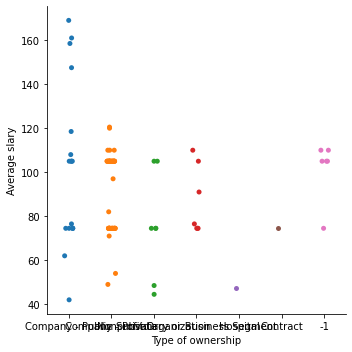

In [65]:
sns.catplot(x="Type of ownership", y="Average slary", data=df)

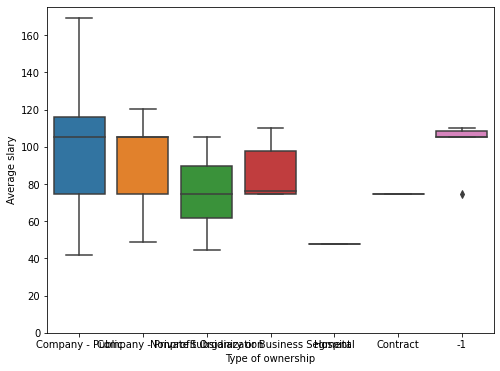

In [74]:
var = 'Type of ownership'
data = pd.concat([df['Average slary'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Average slary", data=df)
fig.axis(ymin=0);

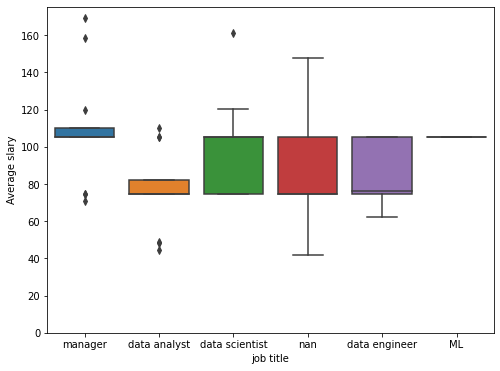

In [75]:
var = 'job title'
data = pd.concat([df['Average slary'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Average slary", data=df)
fig.axis(ymin=0);

# finding the pattern

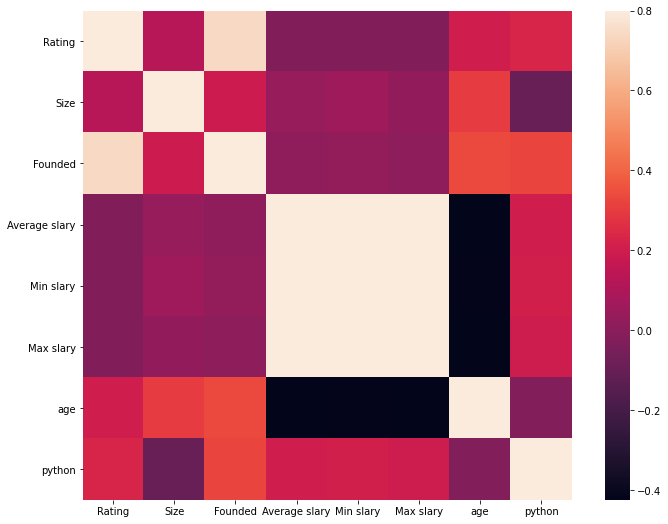

In [71]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [79]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [81]:
import nltk

In [84]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bsl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bsl\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

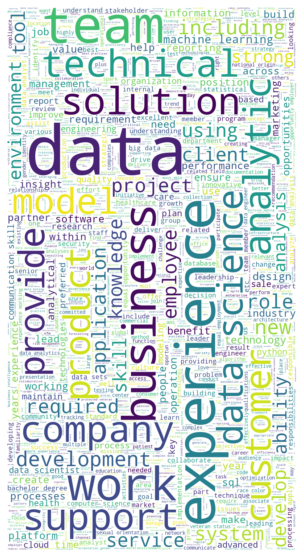

In [87]:

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()